In [1]:
# download helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-19 16:05:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-19 16:05:31 (50.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [1]:
import helper_functions as helper
import tensorflow as tf

# Get 10% of training data of 10 classes of food 101

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-07-19 16:10:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.66.144, 142.250.204.48, 172.217.25.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.66.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  57.1MB/s    in 2.8s    

2022-07-19 16:10:41 (57.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
helper.unzip_data('./10_food_classes_10_percent.zip')

In [5]:
!rm 10_food_classes_10_percent.zip

In [4]:
helper.walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [13]:
train_path = '10_food_classes_10_percent/train'
test_path = '10_food_classes_10_percent/test'

In [14]:
IMG_SHAPE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_path, label_mode='categorical', batch_size=BATCH_SIZE, image_size=IMG_SHAPE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_path,label_mode='categorical', batch_size=BATCH_SIZE, image_size=IMG_SHAPE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [4]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [5]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [6]:
for imgs,labels in train_data_10_percent.take(1):
    print(imgs,labels)

tf.Tensor(
[[[[4.22959185e+00 3.22959185e+00 0.00000000e+00]
   [5.00000000e+00 4.00000000e+00 0.00000000e+00]
   [4.86224461e+00 3.86224484e+00 0.00000000e+00]
   ...
   [1.37862274e+02 1.21367401e+02 9.98520508e+01]
   [1.69122437e+02 1.55122437e+02 1.27979553e+02]
   [1.62530655e+02 1.51530655e+02 1.19530655e+02]]

  [[3.04591823e+00 2.04591823e+00 0.00000000e+00]
   [4.00000000e+00 3.00000000e+00 0.00000000e+00]
   [3.80102015e+00 2.80102015e+00 0.00000000e+00]
   ...
   [1.75964432e+02 1.59949127e+02 1.35535812e+02]
   [1.72555878e+02 1.57759979e+02 1.28693619e+02]
   [1.52734940e+02 1.39734940e+02 1.07734932e+02]]

  [[3.71938777e+00 2.71938777e+00 0.00000000e+00]
   [4.21428585e+00 3.21428585e+00 0.00000000e+00]
   [4.16836739e+00 3.16836739e+00 0.00000000e+00]
   ...
   [1.67765121e+02 1.50122253e+02 1.22673248e+02]
   [1.48469437e+02 1.31597015e+02 1.01382683e+02]
   [1.54428497e+02 1.39214218e+02 1.06137680e+02]]

  ...

  [[1.89000000e+02 1.73505112e+02 1.36142807e+02]
   [1

2022-07-20 13:40:28.843447: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
# normonalize our data

# Building a transfer learning model using functional API

In [37]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [38]:
base_model = EfficientNetB0(
    include_top=False,
)

# Freeze the base model
base_model.trainable = False

# create input in our model 
inputs = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name="input_layer")

# If u are using RestNet50v2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# pass the input in base model
x = base_model(inputs)
print(f"{x.shape}")

# average pool of the base model
x = tf.keras.layers.GlobalAvgPool2D(name="global_avg_pooling_layer")(x)
print(f"shape after glob avg 2d{x.shape}")

# create output layer
outputs = tf.keras.layers.Dense(10,activation='softmax', name="output_layer")(x)

#create a model_0
model_0 = tf.keras.Model(inputs,outputs)

# compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_0_hist = model_0.fit(train_data_10_percent, 
    epochs=5, 
    steps_per_epoch=len(train_data_10_percent), 
    validation_data=(test_data_10_percent), 
    validation_steps=int((0.25*len(test_data_10_percent))),
    callbacks=[helper.create_tensorboard_callback('tranferlearning','10_percent_feature_extraction')]
)

(None, 7, 7, 1280)
shape after glob avg 2d(None, 1280)
Saving TensorBoard log files to: tranferlearning/10_percent_feature_extraction/20220721-231431
Epoch 1/5


2022-07-21 23:14:34.281244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 1.9231 - accuracy: 0.3867

2022-07-21 23:14:44.002556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 17s 462ms/step - loss: 1.9231 - accuracy: 0.3867 - val_loss: 1.3492 - val_accuracy: 0.7155
Epoch 2/5
24/24 [==============================] - 6s 236ms/step - loss: 1.1155 - accuracy: 0.7707 - val_loss: 0.9195 - val_accuracy: 0.8240
Epoch 3/5
24/24 [==============================] - 6s 230ms/step - loss: 0.7887 - accuracy: 0.8280 - val_loss: 0.7438 - val_accuracy: 0.8306
Epoch 4/5
24/24 [==============================] - 5s 221ms/step - loss: 0.6538 - accuracy: 0.8587 - val_loss: 0.6303 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 6s 242ms/step - loss: 0.5551 - accuracy: 0.8707 - val_loss: 0.5872 - val_accuracy: 0.8602


In [39]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 138ms/step - loss: 0.5569 - accuracy: 0.8624


[0.5569043755531311, 0.8624000549316406]

In [11]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [40]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [41]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_4 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

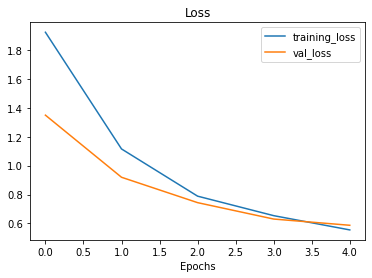

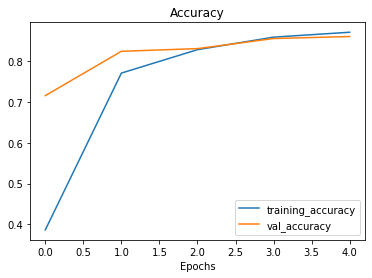

In [42]:
helper.plot_loss_curves(model_0_hist)

# Getting a feature vector from a trained model

In [43]:
input_shape = (1,4,4,3)
random_tensor = tf.random.normal(input_shape)
random_tensor.shape

TensorShape([1, 4, 4, 3])

In [47]:
global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(random_tensor)
print(global_avg_pooled_tensor)

print("shape of global avg ",global_avg_pooled_tensor.shape)

tf.Tensor([[-0.07202567  0.13253771  0.16969982]], shape=(1, 3), dtype=float32)
shape of global avg  (1, 3)


In [53]:
tf.reduce_mean(random_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.07202567,  0.13253771,  0.16969982]], dtype=float32)>

In [54]:
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(random_tensor)
print(global_max_pooled_tensor)
print("shape of global max pool",global_max_pooled_tensor.shape)


tf.Tensor([[1.6071255 1.6031992 1.8059413]], shape=(1, 3), dtype=float32)
shape of global max pool (1, 3)


In [55]:
tf.reduce_max(random_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.6071255, 1.6031992, 1.8059413]], dtype=float32)>

# Running a series of transfer learning experiments
We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data... how about we set up a bunch of experiments to find out:

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation 
2. `model_2` - use feature extraction transfer learning with 10% of the training with data augmentaton 
3. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation 

> 🔑 **Note:** throughout all experiments the same test dataset will be used to evaluate our model... this ensures consistency across evaluation metrics.

## Model_1

In [43]:
# Downloa and unzip and delete the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
helper.unzip_data('10_food_classes_1_percent.zip')
!rm 10_food_classes_1_percent.zip

--2022-07-21 23:15:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.27.48, 172.217.27.16, 142.250.66.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.27.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  55.5MB/s    in 2.3s    

2022-07-21 23:15:26 (55.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [8]:
train_path_one_p = './10_food_classes_1_percent/train'
test_path_one_p = './10_food_classes_1_percent/test'

In [60]:
helper.walk_through_dir(dir_path=train_path_one_p)

There are 10 directories and 0 images in './10_food_classes_1_percent/train'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train/fried_rice'.


In [44]:
# setup data loaders
IMG_SHAPE = (224,224)
train_data_1_p = tf.keras.preprocessing.image_dataset_from_directory(train_path_one_p,batch_size=32, image_size=IMG_SHAPE,label_mode='categorical')
test_data_1_p = tf.keras.preprocessing.image_dataset_from_directory(test_path_one_p,batch_size=32, image_size=IMG_SHAPE,label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## NEW Feature of data preprocessing

In [45]:
# data augmentation stage
from tensorflow.keras.layers.experimental import preprocessing
with tf.device("CPU:0"):
    data_aug = tf.keras.Sequential([
        preprocessing.RandomFlip('horizontal'),
        preprocessing.RandomRotation(.2),
        preprocessing.RandomZoom(.2),
        preprocessing.RandomHeight(.2),
        preprocessing.RandomWidth(.2),
        # preprocessing.Rescale(1/255.) for restnet v225
    ], name="data_aug")


In [46]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visualize our data augmentation

<tf.Tensor: shape=(421, 479, 3), dtype=float32, numpy=
array([[[184.26738, 233.22655, 252.59999],
        [184.85939, 234.14883, 251.61787],
        [185.73587, 235.19894, 251.35815],
        ...,
        [153.     , 144.     , 129.     ],
        [153.     , 144.     , 129.     ],
        [153.     , 144.     , 129.     ]],

       [[183.34872, 231.56348, 252.04074],
        [184.25293, 232.57343, 251.28856],
        [185.59207, 233.99371, 251.46027],
        ...,
        [152.88324, 143.88326, 128.88324],
        [152.9863 , 143.9863 , 128.9863 ],
        [152.99973, 143.99973, 128.99973]],

       [[182.24573, 229.84882, 250.93857],
        [183.68657, 231.24638, 250.84804],
        [185.51244, 233.05205, 251.52634],
        ...,
        [152.63545, 143.63545, 128.63544],
        [152.94225, 143.94225, 128.94225],
        [152.87613, 143.87613, 128.87613]],

       ...,

       [[179.65985, 225.32639, 247.77377],
        [179.54764, 221.98856, 244.79993],
        [180.0424 , 219.800

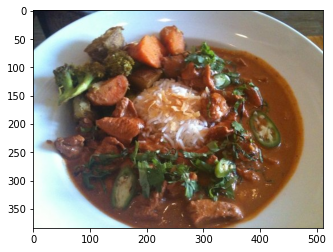

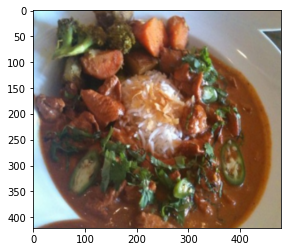

In [133]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_tensor = mpimg.imread('./10_food_classes_1_percent/test/chicken_curry/101833.jpg')
plt.imshow(img_tensor)
auged_img = data_aug(img_tensor,training=True)
plt.figure()
plt.imshow(auged_img/255)
auged_img


In [47]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name="input_layer")
x = data_aug(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAvgPool2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_1_hist = model_1.fit(
    train_data_1_p,
    steps_per_epoch=len(train_data_1_p),
    validation_data=test_data_1_p,
    validation_steps=(.25*len(test_data_1_p)),
    epochs=5
)

Epoch 1/5


2022-07-21 23:15:47.438484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 2.4743 - accuracy: 0.0286   

2022-07-21 23:15:57.688924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 19s 6s/step - loss: 2.4743 - accuracy: 0.0286 - val_loss: 2.2925 - val_accuracy: 0.1547
Epoch 2/5
3/3 [==============================] - 8s 3s/step - loss: 2.2331 - accuracy: 0.1857 - val_loss: 2.1611 - val_accuracy: 0.2219
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 1.9750 - accuracy: 0.4000 - val_loss: 2.0507 - val_accuracy: 0.2938
Epoch 4/5
3/3 [==============================] - 10s 4s/step - loss: 1.7974 - accuracy: 0.5000 - val_loss: 1.9298 - val_accuracy: 0.3719
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.6486 - accuracy: 0.6143 - val_loss: 1.8593 - val_accuracy: 0.4156


In [48]:
model_1.evaluate(test_data_1_p)

79/79 [==============================] - 16s 196ms/step - loss: 1.8451 - accuracy: 0.4412


[1.8451259136199951, 0.44120001792907715]

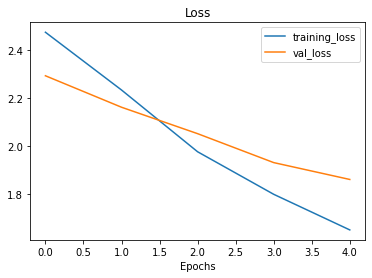

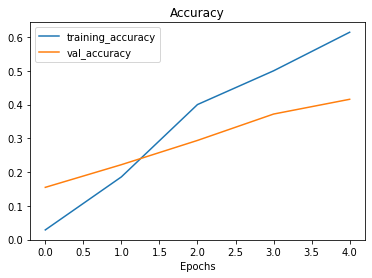

In [49]:
helper.plot_loss_curves(model_1_hist)

## Model 2

In [6]:
from tensorflow.keras.layers.experimental import preprocessing 
with tf.device("CPU:0"):
    data_aug = tf.keras.Sequential([
        preprocessing.RandomFlip('horizontal'),
        preprocessing.RandomRotation(.2),
        preprocessing.RandomZoom(.2),
        preprocessing.RandomHeight(.2),
        preprocessing.RandomWidth(.2),
        # preprocessing.Rescale(1/255.) for restnet v225
    ], name="data_aug")

In [15]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name="input_layer")
x = data_aug(inputs)# augment our training images (augmentation doesn't occur on test data)
x = base_model(x,training=False) # pass augmented images to base model but keep it in inference mode, 
# this also insures batchnorm layers don't get updated - https://keras.io/guides/transfer_learning/#build-a-model


x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax",name='output_layer')(x)


model_2 = tf.keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_2_hist = model_2.fit(
    train_data_10_percent,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=(.25*len(test_data_10_percent)),
    epochs=5
)

Epoch 1/5


2022-07-21 22:46:21.595373: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-21 22:46:21.600230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 2.0114 - accuracy: 0.3333

2022-07-21 22:46:51.289612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 36s 1s/step - loss: 2.0114 - accuracy: 0.3333 - val_loss: 1.5042 - val_accuracy: 0.6469
Epoch 2/5
24/24 [==============================] - 26s 1s/step - loss: 1.3012 - accuracy: 0.6827 - val_loss: 1.0381 - val_accuracy: 0.8031
Epoch 3/5
24/24 [==============================] - 23s 960ms/step - loss: 0.9739 - accuracy: 0.7747 - val_loss: 0.8247 - val_accuracy: 0.8297
Epoch 4/5
24/24 [==============================] - 24s 983ms/step - loss: 0.8250 - accuracy: 0.8160 - val_loss: 0.7103 - val_accuracy: 0.8359
Epoch 5/5
24/24 [==============================] - 22s 907ms/step - loss: 0.7321 - accuracy: 0.8227 - val_loss: 0.6625 - val_accuracy: 0.8453


In [16]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 108ms/step - loss: 0.6262 - accuracy: 0.8500


[0.6261729598045349, 0.8500000238418579]

In [17]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_aug (Sequential)       (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

## Create a model check point

In [18]:
check_point_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

In [22]:
# Create a model check point that saves the weights
check_point_cb = tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,save_weights_only=True,save_best_only=False,save_freq='epoch',verbose=1)

In [23]:
model_2_hist = model_2.fit(
    train_data_10_percent,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=(.25*len(test_data_10_percent)),
    epochs=5,
    callbacks=[check_point_cb]
)

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.6513 - accuracy: 0.8333
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 906ms/step - loss: 0.6513 - accuracy: 0.8333 - val_loss: 0.5953 - val_accuracy: 0.8641
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.8573
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 26s 1s/step - loss: 0.5926 - accuracy: 0.8573 - val_loss: 0.5816 - val_accuracy: 0.8469
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.8667
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 25s 1s/step - loss: 0.5430 - accuracy: 0.8667 - val_loss: 0.5479 - val_accuracy: 0.8594
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.8653
E

In [24]:
result_10_percent_data_aug = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 99ms/step - loss: 0.4947 - accuracy: 0.8672


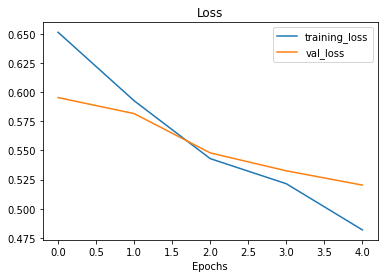

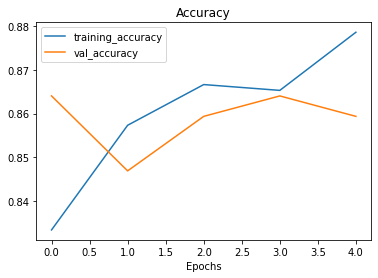

In [26]:
helper.plot_loss_curves(model_2_hist)

### Loading in checkpoint weights

In [27]:
model_2.load_weights(filepath=check_point_path)

In [28]:
loaded_weight_model_res = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 104ms/step - loss: 0.4947 - accuracy: 0.8672


In [31]:
# If result from our loaded weights matched the result_10_percent_data_aug the we work
loaded_weight_model_res == result_10_percent_data_aug
loaded_weight_model_res

[0.4946781098842621, 0.8672000169754028]

In [32]:
result_10_percent_data_aug

[0.49467799067497253, 0.8672000169754028]

In [ ]:
# the pc is using precision store therefore it will show false 

In [33]:
import numpy as np
np.isclose(result_10_percent_data_aug,loaded_weight_model_res)

array([ True,  True])

# Model 3 Fine tuning an existing model on 10% of data

In [50]:
# layers in loaded model
model_2.layers

In [51]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x2ca041eb0> True
<keras.engine.sequential.Sequential object at 0x2c4250a60> True
<keras.engine.functional.Functional object at 0x2cc254b80> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x2cc22adf0> True
<keras.layers.core.dense.Dense object at 0x2cc632a00> True


In [57]:
# EffictionNet B0
for i, layer in enumerate(model_2.layers[2].layers):
    print(i,layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x2c4bd72e0> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x2c4bd7f40> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x2c4bbdb20> False
3 <keras.layers.core.tf_op_layer.TFOpLambda object at 0x2c170f790> False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x2c6681a00> False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x2caa66850> False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x2c4bbd7c0> False
7 <keras.layers.core.activation.Activation object at 0x2c24714f0> False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x2ca73b460> False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x2ca8dcd30> False
10 <keras.layers.core.activation.Activation object at 0x2ca8dc580> False
11 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x28a70561

In [58]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_5 (Rescaling)        (None, None, None,   0           ['input_6[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_5 (Normalization  (None, None, None,   7          ['rescaling_5[0][0]']            
 )                              3)                                                   

## Model 3: Fine-tuning an existing model on 10% of the data

> 🔑 **Note:** Fine-tuning usually works best *after* training a feature extraction model for a few epochs with large amounts of custom data.

In [69]:
# unfreeze the last ten layers of EfficentNet B0
base_model.trainable = True

# freeze all layers except the last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the entire model
# when fine turning  lower learning rate by 10x
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> 🔑 **Note:** When using fine-tuning it's best practice to lower your learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is at least 10x (though different sources will claim other values). A good resource for information on this is the ULMFiT paper: https://arxiv.org/abs/1801.06146 

In [68]:
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x73e22e760> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x73e22edc0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x73e1c2820> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x73e213a90> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x73e219e80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x73e227fd0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x73e23d5e0> False
<keras.layers.core.activation.Activation object at 0x73e251220> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x73e251f10> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x73e25e9a0> False
<keras.layers.core.activation.Activation object at 0x73e25ea00> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x73e26b7f0> False
<keras.layers.res

In [75]:
len(model_2.trainable_variables)

2

In [76]:
fine_tune_epochs = 5 +5

model_2.load_weights(filepath=check_point_path)
hist_fine_10_percent = model_2.fit(
                    train_data_10_percent,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data_10_percent,
                    validation_steps=int((len(test_data_10_percent) * .25)),
                    epochs=fine_tune_epochs,
                    initial_epoch= model_2_hist.epoch[-1], # start training for the last epochs,
                    callbacks=[helper.create_tensorboard_callback(
                        'tranferlearning',
                        "10_percent_fine_tuning"
                    )]
                )

Saving TensorBoard log files to: tranferlearning/10_percent_fine_tuning/20220721-235251
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.4552 - accuracy: 0.8813

2022-07-21 23:53:40.212683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 57s 2s/step - loss: 0.4552 - accuracy: 0.8813 - val_loss: 0.4833 - val_accuracy: 0.8651
Epoch 6/10
24/24 [==============================] - 47s 2s/step - loss: 0.4397 - accuracy: 0.8947 - val_loss: 0.4817 - val_accuracy: 0.8734
Epoch 7/10
24/24 [==============================] - 44s 2s/step - loss: 0.4029 - accuracy: 0.9120 - val_loss: 0.5109 - val_accuracy: 0.8536
Epoch 8/10
24/24 [==============================] - 41s 2s/step - loss: 0.3856 - accuracy: 0.9133 - val_loss: 0.4959 - val_accuracy: 0.8602
Epoch 9/10
24/24 [==============================] - 43s 2s/step - loss: 0.3676 - accuracy: 0.9093 - val_loss: 0.4676 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 44s 2s/step - loss: 0.3578 - accuracy: 0.9093 - val_loss: 0.4889 - val_accuracy: 0.8487


In [77]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 22s 280ms/step - loss: 0.4505 - accuracy: 0.8668


[0.4505463242530823, 0.86680006980896]

In [78]:
res_fine_tune_10 = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 18s 219ms/step - loss: 0.4505 - accuracy: 0.8668


In [79]:
result_10_percent_data_aug

[0.49467799067497253, 0.8672000169754028]